# Epileptic Seizure Detection Using EEG Brain Signals



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# creating the dataframe

data=pd.read_csv('RawData_SNMC_EEG.csv')

## Data Exploration

In [4]:
data.head(-10)

,FP2 - F4,F4 - C4,C4 - P4,P4 - O2,FP2 - F8,F8 - T4,T4 - T6,T6 - O2,FP1 - F3,F3 - C3,C3 - P3,P3 - O1,FP1 - F7,F7 - T3,T3 - T5,T5 - O1,Outcome
0,14,-57,2,1,38,-46,-83,52,-33,-28,-39,64,-65,-30,54,5,0
1,-7,-81,49,-63,40,-34,-122,15,-23,0,-56,21,-27,12,-59,18,0
2,-3,-13,-12,-21,45,-32,-101,38,-11,1,-68,11,-2,56,-135,13,0
3,19,52,-86,86,48,-44,-48,114,-19,-25,-48,33,-11,34,-78,-5,0
4,39,34,-92,107,52,-53,-39,129,-34,-49,-29,63,-52,-18,36,-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87025,-103,-1651,1504,39,-1041,-5,-3901,4736,-9,-61,36,-42,-52,-35,-73,85,1
87026,-103,-1642,1494,45,-1052,-28,-3962,4836,10,-89,57,-78,-56,-46,-85,89,1
87027,-116,-1627,1486,67,-1075,-51,-3783,4718,-11,-56,24,23,-29,-4,-78,92,1
87028,-121,-1621,1487,65,-1074,-21,-3856,4761,-41,-4,-25,122,-11,43,-60,80,1


In [5]:
# to know the shape of the dataframe
data.shape

(87040, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87040 entries, 0 to 87039
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FP2 - F4  87040 non-null  int64
 1   F4 - C4   87040 non-null  int64
 2   C4 - P4   87040 non-null  int64
 3   P4 - O2   87040 non-null  int64
 4   FP2 - F8  87040 non-null  int64
 5   F8 - T4   87040 non-null  int64
 6   T4 - T6   87040 non-null  int64
 7   T6 - O2   87040 non-null  int64
 8   FP1 - F3  87040 non-null  int64
 9   F3 - C3   87040 non-null  int64
 10  C3 - P3   87040 non-null  int64
 11  P3 - O1   87040 non-null  int64
 12  FP1 - F7  87040 non-null  int64
 13  F7 - T3   87040 non-null  int64
 14  T3 - T5   87040 non-null  int64
 15  T5 - O1   87040 non-null  int64
 16  Outcome   87040 non-null  int64
dtypes: int64(17)
memory usage: 11.3 MB


In [7]:
# to find out if there are missing values in the dataset
data.isnull().sum()

FP2 - F4    0
F4 - C4     0
C4 - P4     0
P4 - O2     0
FP2 - F8    0
F8 - T4     0
T4 - T6     0
T6 - O2     0
FP1 - F3    0
F3 - C3     0
C3 - P3     0
P3 - O1     0
FP1 - F7    0
F7 - T3     0
T3 - T5     0
T5 - O1     0
Outcome     0
dtype: int64

We can see that there are no missing values in the dataset.

In [8]:
data.describe()

,FP2 - F4,F4 - C4,C4 - P4,P4 - O2,FP2 - F8,F8 - T4,T4 - T6,T6 - O2,FP1 - F3,F3 - C3,C3 - P3,P3 - O1,FP1 - F7,F7 - T3,T3 - T5,T5 - O1,Outcome
count,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000,87040.000000
mean,0.363660,-56.294187,20.964717,6.765361,-19.447231,-51.995255,-40.223840,83.599897,15.515211,-18.245083,-4.309524,19.311765,-26.667773,17.200747,-14.235823,35.252930,0.500000
std,516.591736,568.735841,506.603956,446.376444,748.123209,631.772366,903.225902,1032.287941,592.257435,600.144831,507.931378,616.825404,553.172245,553.999391,533.952403,675.086055,0.500003
min,-9370.000000,-9370.000000,-9184.000000,-9074.000000,-9333.000000,-9335.000000,-9332.000000,-9334.000000,-9334.000000,-9334.000000,-9148.000000,-9372.000000,-9442.000000,-9370.000000,-9334.000000,-9185.000000,0.000000
25%,-52.000000,-60.000000,-56.000000,-58.000000,-111.000000,-75.000000,-75.000000,-48.000000,-54.000000,-67.000000,-49.000000,-74.000000,-77.000000,-53.000000,-90.000000,-37.000000,0.000000
50%,0.000000,-7.000000,-5.000000,0.000000,2.000000,-22.000000,-2.000000,12.000000,-8.000000,-7.000000,0.000000,3.000000,-15.000000,0.000000,-1.000000,15.000000,0.500000
75%,42.000000,30.000000,50.000000,54.000000,71.000000,37.000000,54.000000,112.000000,46.000000,30.000000,40.000000,67.000000,35.000000,58.000000,51.000000,65.000000,1.000000
max,9370.000000,9197.000000,9334.000000,9221.000000,9292.000000,9405.000000,9297.000000,9333.000000,9445.000000,9373.000000,9371.000000,9443.000000,9296.000000,9371.000000,9332.000000,9334.000000,1.000000


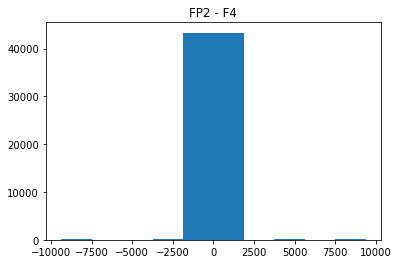

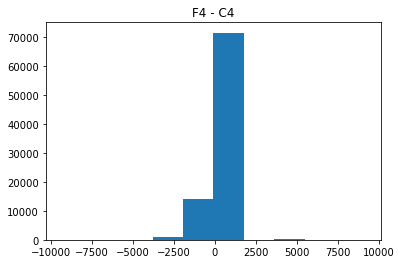

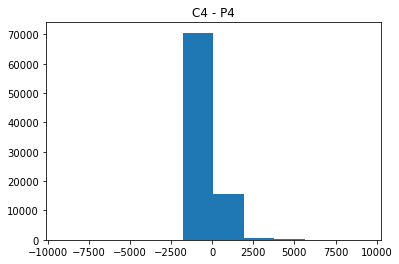

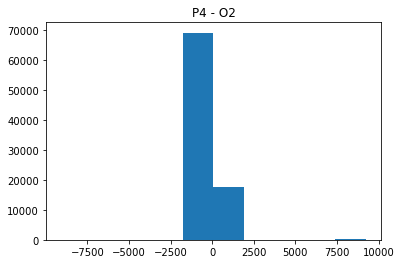

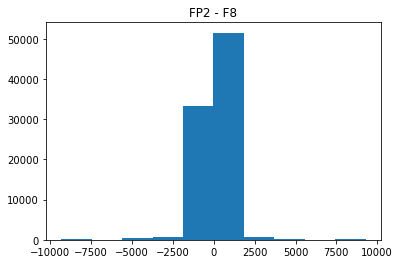

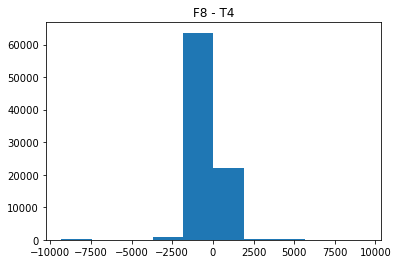

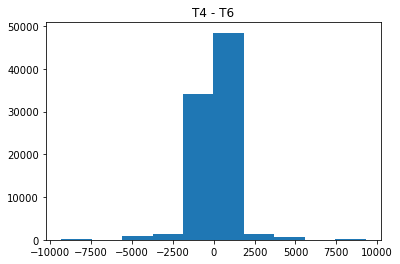

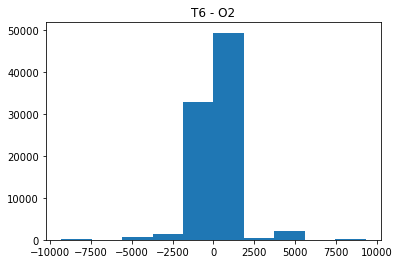

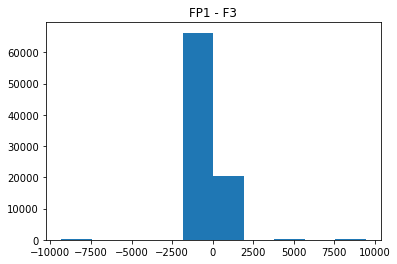

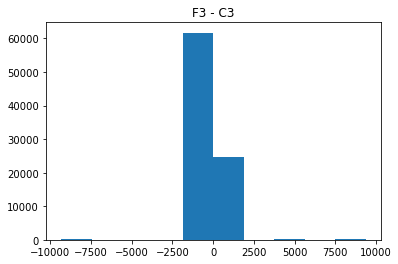

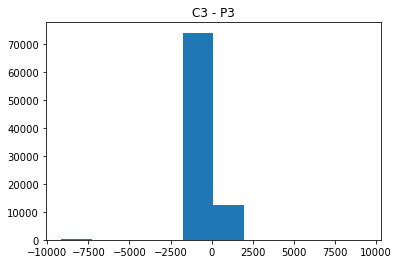

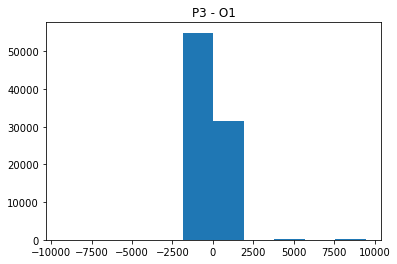

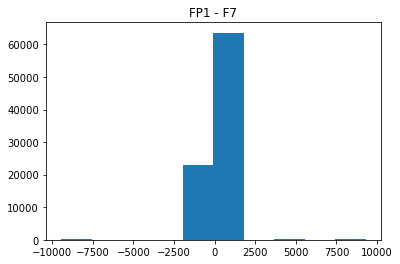

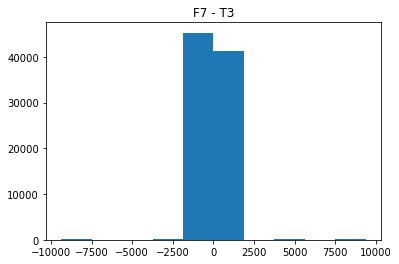

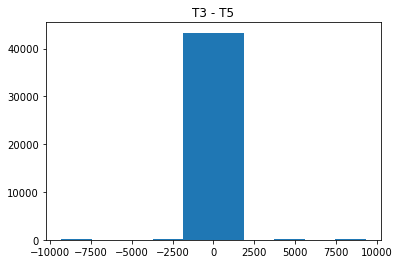

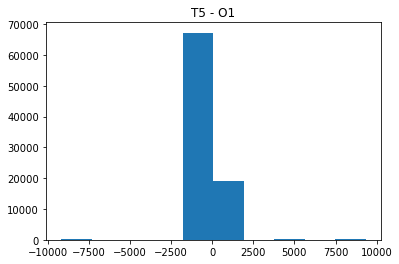

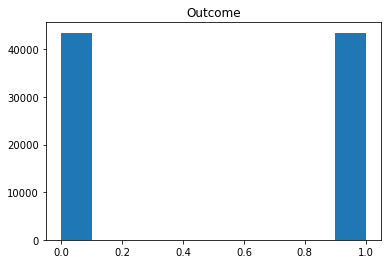

In [9]:
#distributions for all numeric variables 
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [10]:
# print(df_num.corr())

<AxesSubplot:>

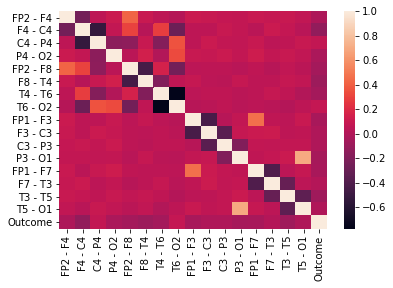

In [11]:
sns.heatmap(data.corr())

In [12]:
# splitting the data into input and target variable

X=data.drop('Outcome', axis=1)
y=data['Outcome']

In [13]:
X.shape

(87040, 16)

In [14]:
y.shape 

(87040,)

## Model Building

We shall be spitting the dataset twice for each of the classifier model. Once in a 50-50 train-test split and once in a 80-20 train-test split. The different models that we will use are
1. k-Nearest Neighbor
2. Decision Trees
3. Naive Bayes
4. Random Forest

### 1. k-Nearest Neighbour

#### 50% train-test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [16]:
X_test.shape, y_test.shape

((43520, 16), (43520,))

In [17]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier
kNN_model_1 = KNeighborsClassifier(n_neighbors=1)
kNN_model_2 = KNeighborsClassifier(n_neighbors=3)
kNN_model_3 = KNeighborsClassifier(n_neighbors=5)
kNN_model_4 = KNeighborsClassifier(n_neighbors=7)

In [18]:
# training the model for k=1
kNN_model_1.fit(X_train, y_train)

# predicting
y_pred = kNN_model_1.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9890395220588235


In [19]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9829822086727033
Recall: 0.9952547682668387


In [20]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[21440   374]
 [  103 21603]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21814
           1       0.98      1.00      0.99     21706

    accuracy                           0.99     43520
   macro avg       0.99      0.99      0.99     43520
weighted avg       0.99      0.99      0.99     43520



In [21]:
# for k value=3

kNN_model_2.fit(X_train, y_train)

# predicting
y_pred = kNN_model_2.predict(X_test)

# accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9850873161764706


In [22]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9753058552661279
Recall: 0.9953008384778402


In [23]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[21267   547]
 [  102 21604]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     21814
           1       0.98      1.00      0.99     21706

    accuracy                           0.99     43520
   macro avg       0.99      0.99      0.99     43520
weighted avg       0.99      0.99      0.99     43520



In [24]:
# for k value=5

kNN_model_3.fit(X_train, y_train)

# predicting
y_pred = kNN_model_3.predict(X_test)

# accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9813648897058823


In [25]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9680989291634929
Recall: 0.9954390491108449


In [26]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[21102   712]
 [   99 21607]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     21814
           1       0.97      1.00      0.98     21706

    accuracy                           0.98     43520
   macro avg       0.98      0.98      0.98     43520
weighted avg       0.98      0.98      0.98     43520



In [27]:
# for k value=7

kNN_model_4.fit(X_train, y_train)

# predicting
y_pred = kNN_model_4.predict(X_test)

# accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9783088235294117


In [28]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9626114081996435
Recall: 0.9951626278448356


In [29]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[20975   839]
 [  105 21601]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     21814
           1       0.96      1.00      0.98     21706

    accuracy                           0.98     43520
   macro avg       0.98      0.98      0.98     43520
weighted avg       0.98      0.98      0.98     43520



#### 80% train-test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [31]:
X_test.shape, y_test.shape

((17408, 16), (17408,))

In [32]:
X.shape

(87040, 16)

In [33]:
# KNN Classification

kNN_model_5 = KNeighborsClassifier(n_neighbors=1)
kNN_model_6 = KNeighborsClassifier(n_neighbors=3)
kNN_model_7 = KNeighborsClassifier(n_neighbors=5)
kNN_model_8 = KNeighborsClassifier(n_neighbors=7)

In [34]:
# training the model for k=1
kNN_model_5.fit(X_train, y_train)

# predicting
y_pred = kNN_model_5.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897748161764706


In [35]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9849846433852804
Recall: 0.9947156806433084


In [36]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8571  132]
 [  46 8659]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8703
           1       0.98      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



In [37]:
# training the model for k=3
kNN_model_6.fit(X_train, y_train)

# predicting
y_pred = kNN_model_6.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9880514705882353


In [38]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9817439619004422
Recall: 0.9946008041355543


In [39]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8542  161]
 [  47 8658]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8703
           1       0.98      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



In [40]:
# training the model for k=5
kNN_model_7.fit(X_train, y_train)

# predicting
y_pred = kNN_model_7.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9852366727941176


In [41]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9765342960288809
Recall: 0.994371051120046


In [42]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8495  208]
 [  49 8656]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8703
           1       0.98      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



In [43]:
# training the model for k=7
kNN_model_8.fit(X_train, y_train)

# predicting
y_pred = kNN_model_8.predict(X_test)

# accuracy calculation

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9824793198529411


In [44]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9710632570659489
Recall: 0.9946008041355543


In [45]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8445  258]
 [  47 8658]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8703
           1       0.97      0.99      0.98      8705

    accuracy                           0.98     17408
   macro avg       0.98      0.98      0.98     17408
weighted avg       0.98      0.98      0.98     17408



### 2. Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

#### 50% train-test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [48]:
X_test.shape

(43520, 16)

In [49]:
DT1 = DecisionTreeClassifier(random_state=0)

# training the classifier
DT1 = DT1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT1.predict(X_test)

In [50]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9665670955882353


In [51]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9632188114735349
Recall: 0.9700082926379803


In [52]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[21010   804]
 [  651 21055]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     21814
           1       0.96      0.97      0.97     21706

    accuracy                           0.97     43520
   macro avg       0.97      0.97      0.97     43520
weighted avg       0.97      0.97      0.97     43520



#### 80% train-test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [54]:
X_test.shape

(17408, 16)

In [55]:
DT2 = DecisionTreeClassifier(random_state=0)

# training
DT2 = DT2.fit(X_train,y_train)

# predictiong
y_pred = DT2.predict(X_test)

In [56]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9730583639705882


In [57]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9696624087591241
Recall: 0.9766800689259046


In [58]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8437  266]
 [ 203 8502]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8703
           1       0.97      0.98      0.97      8705

    accuracy                           0.97     17408
   macro avg       0.97      0.97      0.97     17408
weighted avg       0.97      0.97      0.97     17408



### 3. Naive Bayes Classifier

#### 50% train-test split

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [61]:
gnb1 = GaussianNB()

# training
gnb1.fit(X_train, y_train)

# predictiong
y_pred = gnb1.predict(X_test)

In [62]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5810202205882353


In [63]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5482570745538444
Recall: 0.9086427715838938


In [64]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[ 5563 16251]
 [ 1983 19723]]
              precision    recall  f1-score   support

           0       0.74      0.26      0.38     21814
           1       0.55      0.91      0.68     21706

    accuracy                           0.58     43520
   macro avg       0.64      0.58      0.53     43520
weighted avg       0.64      0.58      0.53     43520



#### 80% train test split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [66]:
gnb2 = GaussianNB()

# training
gnb2.fit(X_train, y_train)

# predictiong
y_pred = gnb2.predict(X_test)

In [67]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5801355698529411


In [68]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5484520338747744
Recall: 0.907639287765652


In [69]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[2198 6505]
 [ 804 7901]]
              precision    recall  f1-score   support

           0       0.73      0.25      0.38      8703
           1       0.55      0.91      0.68      8705

    accuracy                           0.58     17408
   macro avg       0.64      0.58      0.53     17408
weighted avg       0.64      0.58      0.53     17408



### 4. Random Forest Classifier

#### 50% train-test split

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [72]:
rfc1=RandomForestClassifier(n_estimators=100, random_state=0)

# training
rfc1.fit(X_train,y_train)

# predict
y_pred = rfc1.predict(X_test)

In [73]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9919806985294117


In [74]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9904018369690012
Recall: 0.9935501704597807


In [75]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[21605   209]
 [  140 21566]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21814
           1       0.99      0.99      0.99     21706

    accuracy                           0.99     43520
   macro avg       0.99      0.99      0.99     43520
weighted avg       0.99      0.99      0.99     43520



#### 80% train-test split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [77]:
rfc2=RandomForestClassifier(n_estimators=100, random_state=0)

# training
rfc2.fit(X_train,y_train)

# predict
y_pred = rfc2.predict(X_test)

In [78]:
# accuracy measurement
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9920726102941176


In [79]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9911707373007682
Recall: 0.992992533026996


In [80]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8626   77]
 [  61 8644]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8703
           1       0.99      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



#### Finding Important Features

In [81]:
feature_imp = pd.Series(rfc2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

T3 - T5     0.130202
F4 - C4     0.119154
T6 - O2     0.090790
T4 - T6     0.073727
P4 - O2     0.067644
P3 - O1     0.062464
C4 - P4     0.061641
C3 - P3     0.057668
FP2 - F8    0.052149
T5 - O1     0.051932
F8 - T4     0.050386
FP1 - F3    0.041490
FP1 - F7    0.040026
F7 - T3     0.037482
F3 - C3     0.036194
FP2 - F4    0.027051
dtype: float64

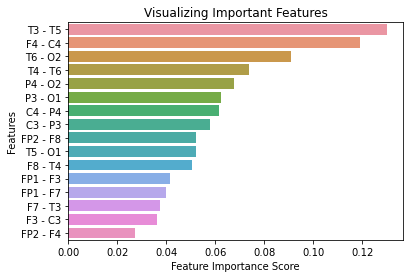

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [83]:
# dropping the least important feature and building the model again to see its effect on the accuracy

X_train = X_train.drop(['FP2 - F4'], axis=1,errors='ignore')

X_test = X_test.drop(['FP2 - F4'], axis=1,errors='ignore')

# building the model again

rfc_imp_features=RandomForestClassifier(n_estimators=100, random_state=0)

# training
rfc_imp_features.fit(X_train,y_train)

# predict
y_pred = rfc_imp_features.predict(X_test)

# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9919002757352942


In [84]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9904925544100802
Recall: 0.9933371625502585


In [85]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8620   83]
 [  58 8647]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8703
           1       0.99      0.99      0.99      8705

    accuracy                           0.99     17408
   macro avg       0.99      0.99      0.99     17408
weighted avg       0.99      0.99      0.99     17408



### 5. Neural Network

#### 50% train-test split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [112]:
from keras.models import Sequential
from keras.layers import Dense

In [113]:
# defining the model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
4352/4352 [==============================] - 5s 960us/step - loss: 2.9404 - accuracy: 0.6586
Epoch 2/150
4352/4352 [==============================] - 4s 958us/step - loss: 0.5726 - accuracy: 0.7196
Epoch 3/150
4352/4352 [==============================] - 4s 959us/step - loss: 0.4419 - accuracy: 0.8011
Epoch 4/150
4352/4352 [==============================] - 4s 994us/step - loss: 0.3543 - accuracy: 0.8512
Epoch 5/150
4352/4352 [==============================] - 4s 968us/step - loss: 0.2892 - accuracy: 0.8919
Epoch 6/150
4352/4352 [==============================] - 4s 973us/step - loss: 0.2471 - accuracy: 0.9101
Epoch 7/150
4352/4352 [==============================] - 4s 963us/step - loss: 0.2270 - accuracy: 0.9204
Epoch 8/150
4352/4352 [==============================] - 4s 978us/step - loss: 0.2125 - accuracy: 0.9263
Epoch 9/150
4352/4352 [==============================] - 4s 1ms/step - loss: 0.2043 - accuracy: 0.9296
Epoch 10/150
4352/4352 [==============================] -

4352/4352 [==============================] - 4s 922us/step - loss: 0.1147 - accuracy: 0.9618
Epoch 79/150
4352/4352 [==============================] - 4s 936us/step - loss: 0.1178 - accuracy: 0.9616
Epoch 80/150
4352/4352 [==============================] - 4s 916us/step - loss: 0.1183 - accuracy: 0.9614
Epoch 81/150
4352/4352 [==============================] - 4s 925us/step - loss: 0.1167 - accuracy: 0.9621
Epoch 82/150
4352/4352 [==============================] - 4s 921us/step - loss: 0.1128 - accuracy: 0.9633
Epoch 83/150
4352/4352 [==============================] - 4s 928us/step - loss: 0.1150 - accuracy: 0.9617
Epoch 84/150
4352/4352 [==============================] - 4s 922us/step - loss: 0.1172 - accuracy: 0.9625
Epoch 85/150
4352/4352 [==============================] - 4s 922us/step - loss: 0.1162 - accuracy: 0.9623
Epoch 86/150
4352/4352 [==============================] - 4s 922us/step - loss: 0.1131 - accuracy: 0.9627
Epoch 87/150
4352/4352 [==============================] - 4

In [116]:
# predicting
y_pred = (model.predict(X_test) > 0.5).astype(int)

1360/1360 [==============================] - 2s 938us/step


In [117]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9595588235294118


In [118]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9481844328599677
Recall: 0.9720353819220492


In [119]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[20661  1153]
 [  607 21099]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     21814
           1       0.95      0.97      0.96     21706

    accuracy                           0.96     43520
   macro avg       0.96      0.96      0.96     43520
weighted avg       0.96      0.96      0.96     43520



#### 80% train-test split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [101]:
# defining the model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
6964/6964 [==============================] - 8s 1ms/step - loss: 2.2708 - accuracy: 0.6388
Epoch 2/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.4724 - accuracy: 0.7504
Epoch 3/150
6964/6964 [==============================] - 7s 998us/step - loss: 0.3867 - accuracy: 0.8058
Epoch 4/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.3489 - accuracy: 0.8356
Epoch 5/150
6964/6964 [==============================] - 7s 999us/step - loss: 0.3095 - accuracy: 0.8621
Epoch 6/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.2485 - accuracy: 0.9008
Epoch 7/150
6964/6964 [==============================] - 7s 995us/step - loss: 0.1955 - accuracy: 0.9314
Epoch 8/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.1806 - accuracy: 0.9365
Epoch 9/150
6964/6964 [==============================] - 7s 993us/step - loss: 0.1736 - accuracy: 0.9399
Epoch 10/150
6964/6964 [==============================] - 7s 986u

6964/6964 [==============================] - 7s 1ms/step - loss: 0.1285 - accuracy: 0.9571
Epoch 80/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.1294 - accuracy: 0.9568
Epoch 81/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.1289 - accuracy: 0.9575
Epoch 82/150
6964/6964 [==============================] - 7s 990us/step - loss: 0.1285 - accuracy: 0.9570
Epoch 83/150
6964/6964 [==============================] - 7s 958us/step - loss: 0.1280 - accuracy: 0.9581
Epoch 84/150
6964/6964 [==============================] - 7s 993us/step - loss: 0.1271 - accuracy: 0.9576
Epoch 85/150
6964/6964 [==============================] - 7s 998us/step - loss: 0.1284 - accuracy: 0.9575
Epoch 86/150
6964/6964 [==============================] - 7s 1ms/step - loss: 0.1278 - accuracy: 0.9581
Epoch 87/150
6964/6964 [==============================] - 7s 991us/step - loss: 0.1274 - accuracy: 0.9574
Epoch 88/150
6964/6964 [==============================] - 7s 998us/

In [104]:
# predicting
y_pred = (model.predict(X_test) > 0.5).astype(int)

544/544 [==============================] - 1s 853us/step


In [105]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9624310661764706


In [106]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9475264035575319
Recall: 0.9790924755887421


In [107]:
print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

[[8231  472]
 [ 182 8523]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      8703
           1       0.95      0.98      0.96      8705

    accuracy                           0.96     17408
   macro avg       0.96      0.96      0.96     17408
weighted avg       0.96      0.96      0.96     17408



## Result and Conclusion

<b>For the 50-50 split, the accuracy was as follows</b>
<ol>
<li>Random Forest Classifier
    <ul><li>accuracy = 99.198</li></ul>
    </li>
<li>k-NN
    <ul><li>accuracy = 98.903% for k=1</li>
    <li>accuracy = 98.508% for k=3</li>
    <li>accuracy = 98.136% for k=5</li>
    <li>accuracy = 97.830% for k=7</li>
    </ul>
</li>
<li>
Decision Trees
    <ul><li>accuracy = 96.656</li>
    </ul>
</li>
<li>
Naive Bayes
    <ul><li>accuracy = 58.102</li>
    </ul>
</li>

<b>For the 80-20 split, the accuracy was as follows</b>
<ol>
    <li>Random Forest Classifier
    <ul><li>accuracy = 99.207</li></ul>
    </li>
<li>k-NN
    <ul><li>accuracy = 98.977% for k=1</li>
    <li>accuracy = 98.805% for k=3</li>
    <li>accuracy = 98.523% for k=5</li>
    <li>accuracy = 98.247% for k=7</li>
    </ul>
</li>
<li>
Decision Trees
    <ul><li>accuracy = 97.305</li>
    </ul>
</li>
<li>
Naive Bayes
    <ul><li>accuracy = 58.013</li>
    </ul>
</li>
</ol>

Hence it can be concluded that Random Forest Classifier yielded the best results in terms of accuracy. For precision, in the 80-20 split of the data, Random Forest was still the best with precision of 99.11. The highest recall was yielded by the kNN algorith in the 50-50 test-train split with k=5 with 99.543.